In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
#conversion function for turning string numbers (ex: 5K) into actual numbers(ex: 5000)
def convert(value):
    if value:
        multiple = 1
        if value.endswith("K"):
            multiple = 1000
            value = value[0:len(value)-1]
        elif value.endswith("M"):
            multiple = 1000000
            value = value[0:len(value)-1]
        return int(float(value) * multiple)
    else:
        return 0

In [3]:
#read data
instaFile ="Resources/social media influencers - instagram.csv" 
instagram_df1= pd.read_csv(instaFile)
#display(instagram_df1)

instaFile2="Resources/instagram_global_top_1000.csv"
instagram_df2= pd.read_csv(instaFile2)
#display(instagram_df2)


#data cleaning 

#display(instagram_df1.isnull().sum())
#drop rows from dataframe where category is missing
#drop rows where country data is missing

instagram_df1 = instagram_df1.dropna(subset=['category_1'])
instagram_df1 = instagram_df1.dropna(subset=['Audience country(mostly)'])
# Check how many having missing are dropped
#display(instagram_df1.isnull().sum())

#drop rows with duplicate instagram instance name
instagram_df1 =instagram_df1.drop_duplicates(subset=["instagram name"],keep='last')

#remove spaces if any from attributes
instagram_df1.columns = instagram_df1.columns.str.replace(' ', '')
# replace messy string column names
instagram_df1.columns=instagram_df1.columns.str.replace('[\t|\n|\r]','',regex=True)


#Convert millions(M) and thousands(K) string data values from 3 columns to numerical form
instagram_df1["Followers"]=instagram_df1["Followers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
instagram_df1["Authenticengagement"]=instagram_df1["Authenticengagement"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
instagram_df1["Engagementavg"]=instagram_df1["Engagementavg"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)


display(instagram_df1)

#link and see the other dataset
#remove spaces if any from attributes
instagram_df2.columns = instagram_df2.columns.str.replace(' ', '')
display(instagram_df2)



instagram_df1['Audiencecountry(mostly)'].unique()

clean_yt


,Influencerinstaname,instagramname,category_1,category_2,Followers,Audiencecountry(mostly),Authenticengagement,Engagementavg
0,433,433,Sports with a ball,NaN,48500000,Spain,383100,637000
1,__youngbae__,TAEYANG,Music,NaN,12700000,Indonesia,478000,542300
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18800000,Russia,310800,377900
3,_imyour_joy,Joy,Lifestyle,NaN,13500000,Indonesia,1100000,1400000
6,_rl9,Robert Lewandowski,Sports with a ball,NaN,25000000,Poland,588600,749000
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136100000,United States,6400000,8600000
996,zidane,zidane,Sports with a ball,NaN,31200000,Spain,546000,744100
997,zkdlin,KAI,Music,NaN,13900000,Indonesia,1300000,1600000
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8199999,United States,583000,885500


,Country,Rank,Account,Title,Link,Category,Followers,AudienceCountry,Authenticengagement,Engagementavg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803
...,...,...,...,...,...,...,...,...,...,...,...
995,All,996,senoritasaeva,Dina Saeva,https://www.instagram.com/senoritasaeva/,Lifestyle|Music|Modeling,7700000.0,Russia,246600.0,318200.0,2022-02-07 16:50:24.798803
996,All,997,manuelneuer,Manuel Neuer,https://www.instagram.com/manuelneuer/,Sports with a ball,11500000.0,Germany,146500.0,210200.0,2022-02-07 16:50:24.798803
997,All,998,sahilkhan,India’s Youth & Fitness IC⭕️N®,https://www.instagram.com/sahilkhan/,Fitness|Gym,10100000.0,India,176500.0,239800.0,2022-02-07 16:50:24.798803
998,All,999,mohanshakti,Shakti Mohan,https://www.instagram.com/mohanshakti/,Art|Artists|Cinema|Actors/actresses,13700000.0,India,146400.0,175500.0,2022-02-07 16:50:24.798803


,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Authenticengagement
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800,290,333790
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800,4600,1485400
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700,32367700
7,WWEFanNation,WWE,Video games,86900000,United States,76600,2800,163,79563
8,zeemusiccompany,Zee Music Company,Music & Dance,82700000,India,108700,4200,155,113055
...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100,2500,1512600
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700,636,275136
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200,874,307074
998,CricketICC,ICC,Sports,9200000,India,15200,854,58,16112


In [27]:
instagram_df1['Audiencecountry(mostly)'].value_counts()
groupby_clean_insta = instagram_df1.groupby(["Audiencecountry(mostly)"])
Clean_insta_followers= groupby_clean_insta.sum().sort_values(by="Followers",ascending=False)
display(Clean_insta_followers)

#display(clean_yt)


clean_yt['Audience Country'].value_counts()
groupby_clean_yt = clean_yt.groupby(["Audience Country"])
Clean_yt_subcribers= groupby_clean_yt.sum().sort_values(by="Subscribers",ascending=False)
display(Clean_yt_subcribers)




,Followers,Authenticengagement,Engagementavg
Audiencecountry(mostly),,,
United States,8718599992,145822999,218926699
India,5110999999,84746799,105764300
Brazil,3593299999,57933800,87221900
Indonesia,1928200000,99419700,123395699
Spain,782400000,12246500,17820000
Mexico,734699999,23213700,29585700
Argentina,654300000,15371400,22914300
Russia,359099999,13226300,17884300
United Kingdom,342200000,5596200,8496700


,Subscribers,avg views,avg likes,avg comments,Authenticengagement
Audience Country,,,,,
United States,4180700000,343656799,14719601,701248,359077648
India,2341700000,84332098,5233805,397586,89963489
Brazil,1124600000,37409100,2559880,210296,40179276
Mexico,728099999,45996000,2787210,116199,48899409
Indonesia,508400000,16904873,748441,35545,17688859
Russia,426100000,87154800,5320184,369656,92844640
Philippines,170600000,9373600,455853,21667,9851120
Thailand,153100000,2166200,132570,9446,2308216
Colombia,125299999,4404700,239095,10271,4654066


Text(0.5, 0, 'Countries')

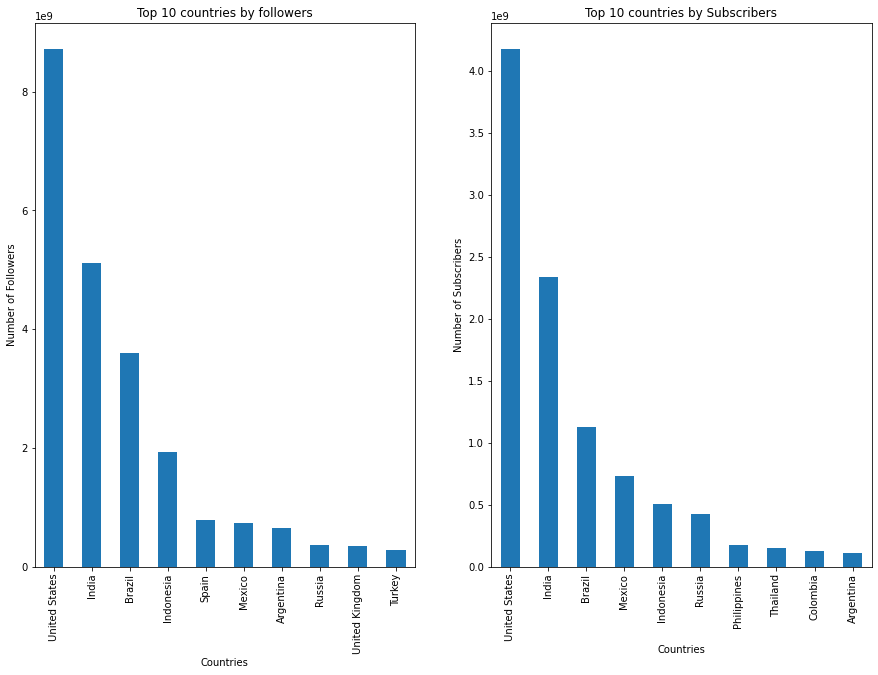

In [33]:
fig, (ax1, ax2)= plt.subplots(1,2)
Clean_insta_followers["Followers"].iloc[0:10].plot(ax=ax1,kind="bar",figsize=(15,10))
ax1.set_title("Top 10 countries by followers")
ax1.set_ylabel("Number of Followers")
ax1.set_xlabel("Countries") 
Clean_yt_subcribers["Subscribers"].iloc[0:10].plot(ax=ax2,kind="bar",figsize=(15,10))
ax2.set_title("Top 10 countries by Subscribers")
ax2.set_ylabel("Number of Subscribers")
ax2.set_xlabel("Countries")

In [ ]:
Clean_yt_subcribers.plot()

Text(0.5, 0, 'Countries')

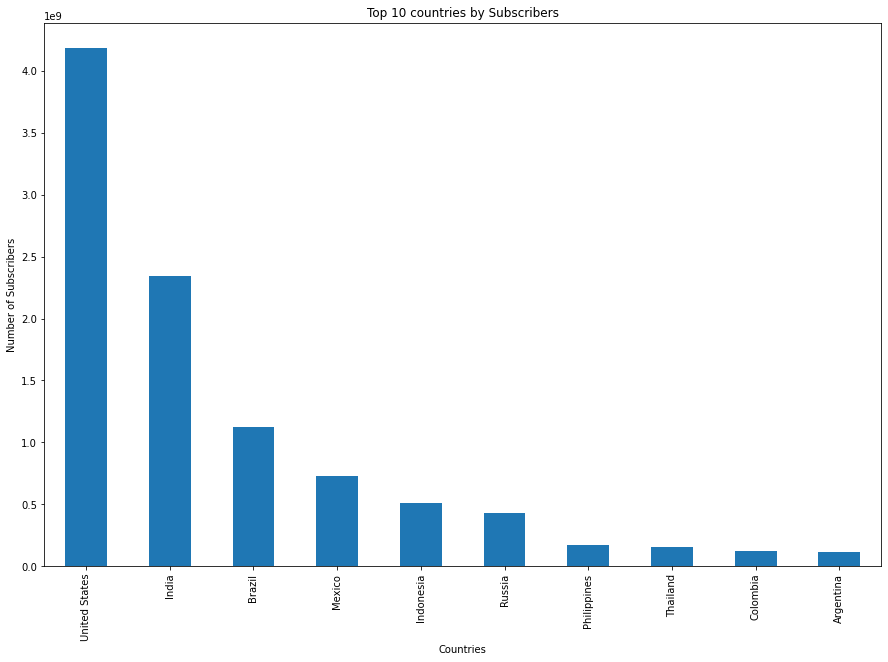

In [28]:
Clean_yt_subcribers["Subscribers"].iloc[0:10].plot(kind="bar",figsize=(15,10))
plt.title("Top 10 countries by Subscribers")
plt.ylabel("Number of Subscribers")
plt.xlabel("Countries")

In [5]:
#read in youtube data
youtubeFile ="Resources/social media influencers - youtube.csv" 
youtube_df= pd.read_csv(youtubeFile)
youtube_df


youtubeFile_2 ="Resources/Top YouTube Channels Data.csv"
youtubeFile_2=pd.read_csv(youtubeFile_2)
youtubeFile_2

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013
...,...,...,...,...,...,...,...
95,96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012
96,97,Like Nastya ESP,32600000,"15,144,858,210",584.0,Entertainment,2017
97,98,Ryan's World,32400000,"51,312,603,726",2155.0,Entertainment,2015
98,99,ABP News,32300000,"9,850,740,503",209351.0,People & Blogs,2012


In [6]:
#find duplicate youtubers
yt_unique = len(youtube_df["youtuber name"].unique())
youtube_df.loc[youtube_df.duplicated(keep = False),:]

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
549,ETV Jabardasth,ETV Jabardasth,NaN,12.5M,India,192.6K,2.7K,44
550,ETV Jabardasth,ETV Jabardasth,NaN,12.5M,India,192.6K,2.7K,44


In [7]:
#data cleaning for youtube data
clean_yt = youtube_df.drop(549)
clean_yt["Subscribers"] = [convert(value) for value in clean_yt["Subscribers"]]
clean_yt["avg views"] = [convert(value) for value in clean_yt["avg views"]]
clean_yt["avg likes"] = clean_yt["avg likes"].fillna(0)
clean_yt["avg likes"] = [convert(value) for value in clean_yt["avg likes"]]
clean_yt["avg comments"] = clean_yt["avg comments"].fillna(0)
clean_yt["avg comments"] = [convert(value) for value in clean_yt["avg comments"]]
clean_yt.sort_values("Subscribers", ascending = False).reset_index()

clean_yt = clean_yt.dropna(subset = ["Category"])
clean_yt.reset_index()

#drop rows from Audience Country that are empty
clean_yt = clean_yt.dropna(subset = ["Audience Country"])
clean_yt.reset_index()

#Sum the column values from avg_views,avg_likes,avg_comments to a new column "Authenticengagement" 
clean_yt['Authenticengagement'] = clean_yt['avg views'] + clean_yt['avg likes'] +clean_yt['avg comments']
display(clean_yt)



,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Authenticengagement
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800,290,333790
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800,4600,1485400
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700,32367700
7,WWEFanNation,WWE,Video games,86900000,United States,76600,2800,163,79563
8,zeemusiccompany,Zee Music Company,Music & Dance,82700000,India,108700,4200,155,113055
...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100,2500,1512600
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700,636,275136
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200,874,307074
998,CricketICC,ICC,Sports,9200000,India,15200,854,58,16112


In [8]:
''' 3.Can we predict the relationship between category and engagement level (Instagram, Youtube)?
- Does higher engagement(followers) lead to attract category.
- Do we have max subscriber because the content has been shared/viewed/liked/ maximum times? '''

display(clean_yt)
display(youtubeFile_2)

# Data export csv for review
clean_yt.to_csv("clean_youtube.csv", index=False, header=True)




,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Authenticengagement
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800,290,333790
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800,4600,1485400
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700,32367700
7,WWEFanNation,WWE,Video games,86900000,United States,76600,2800,163,79563
8,zeemusiccompany,Zee Music Company,Music & Dance,82700000,India,108700,4200,155,113055
...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100,2500,1512600
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700,636,275136
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200,874,307074
998,CricketICC,ICC,Sports,9200000,India,15200,854,58,16112


,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013
...,...,...,...,...,...,...,...
95,96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012
96,97,Like Nastya ESP,32600000,"15,144,858,210",584.0,Entertainment,2017
97,98,Ryan's World,32400000,"51,312,603,726",2155.0,Entertainment,2015
98,99,ABP News,32300000,"9,850,740,503",209351.0,People & Blogs,2012


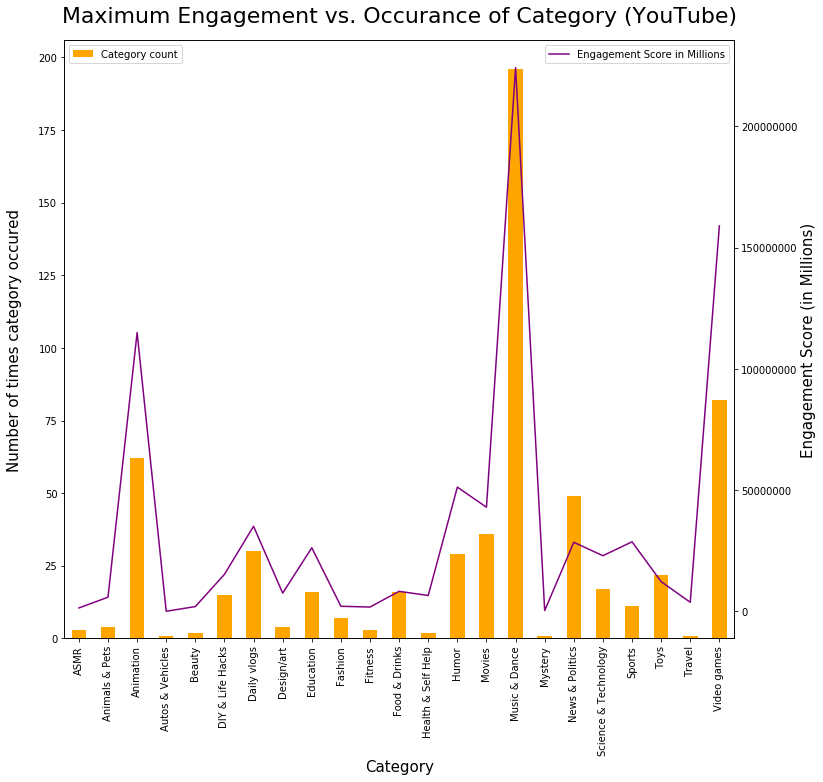

In [9]:
#groupby fnuction on categories from youtube data
groupby_clean_yt = clean_yt.groupby(["Category"])
groupby_clean_yt_bar=pd.DataFrame(groupby_clean_yt["Category"].count())
groupby_clean_yt_line=pd.DataFrame(groupby_clean_yt["Authenticengagement"].sum())

#plot line chart on axis# 1
catEngagementPlot=groupby_clean_yt_bar.plot(kind="bar",figsize=(12,11),rot=90,color="orange")
plt.ylabel("Number of times category occured", labelpad=16,fontsize=15)
plt.xlabel("Category",fontsize=15)
plt.title("Maximum Engagement vs. Occurance of Category (YouTube)", y=1.02, fontsize=22)
text=plt.legend(loc="upper left")
text.get_texts()[0].set_text('Category count')


#set up second axis
ax2 = catEngagementPlot.twinx()
ax2.plot(groupby_clean_yt_line,color="purple")
ax2.set_ylabel("Engagement Score (in Millions)",fontsize=15)
ax2.legend(['Engagement Score in Millions'], loc="upper right")
current_values = plt.gca().get_yticks()
ax2 = plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


